In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
!pip install mtcnn

In [20]:
# face detection for the 5 Celebrity Faces Dataset
from os import listdir
from os.path import isdir
from PIL import Image
from matplotlib import pyplot
from numpy import savez_compressed
from numpy import asarray
from mtcnn.mtcnn import MTCNN

In [21]:
# function for face detection with mtcnn
from PIL import Image
from numpy import asarray
from mtcnn.mtcnn import MTCNN

# extract a single face from a given photograph
def extract_face(filename, required_size=(160, 160)):
	# load image from file
	image = Image.open(filename)
	# convert to RGB, if needed
	image = image.convert('RGB')
	# convert to array
	pixels = asarray(image)
	# create the detector, using default weights
	detector = MTCNN()
	# detect faces in the image
	results = detector.detect_faces(pixels)
	# extract the bounding box from the first face
	x1, y1, width, height = results[0]['box']
	# bug fix
	x1, y1 = abs(x1), abs(y1)
	x2, y2 = x1 + width, y1 + height
	# extract the face
	face = pixels[y1:y2, x1:x2]
	# resize pixels to the model size
	image = Image.fromarray(face)
	image = image.resize(required_size)
	face_array = asarray(image)
	return face_array

filename = '/content/drive/MyDrive/faceRecognition/faces/Sai Rashwant/IMG-20240215-WA0039.jpg'
# load the photo and extract the face
pixels = extract_face(filename)

4/4 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 128ms/step


[2024-02-23 03:46:38] WARNING - polymorphic_function.py - 5 out of the last 18 calls to <function Model.make_predict_function.<locals>.predict_function at 0x7ea5a1038160> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


1/1 [==============================] - 0s 186ms/step
1 (160, 160, 3)
1/1 [==============================] - 0s 110ms/step
2 (160, 160, 3)
1/1 [==============================] - 1s 602ms/step
3 (160, 160, 3)
1/1 [==============================] - 0s 279ms/step
4 (160, 160, 3)
1/1 [==============================] - 0s 239ms/step
5 (160, 160, 3)
9/9 [==============================] - 0s 8ms/step


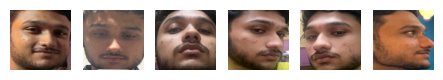

In [22]:
# demonstrate face detection on 4 Faces Dataset
from os import listdir
from PIL import Image
from numpy import asarray
from matplotlib import pyplot
from mtcnn.mtcnn import MTCNN

# extract a single face from a given photograph
def extract_face(filename, required_size=(160, 160)):
	# load image from file
	image = Image.open(filename)
	# convert to RGB, if needed
	image = image.convert('RGB')
	# convert to array
	pixels = asarray(image)
	# create the detector, using default weights
	detector = MTCNN()
	# detect faces in the image
	results = detector.detect_faces(pixels)
	# extract the bounding box from the first face
	x1, y1, width, height = results[0]['box']
	# bug fix
	x1, y1 = abs(x1), abs(y1)
	x2, y2 = x1 + width, y1 + height
	# extract the face
	face = pixels[y1:y2, x1:x2]
	# resize pixels to the model size
	image = Image.fromarray(face)
	image = image.resize(required_size)
	face_array = asarray(image)
	return face_array

# specify folder to plot
folder = '/content/drive/MyDrive/faceRecognition/faces/Sai Rashwant/'
i = 1
# enumerate files
for filename in listdir(folder):
	# path
	path = folder + filename
	# get face
	face = extract_face(path)
	print(i, face.shape)
	# plot
	pyplot.subplot(2, 7, i)
	pyplot.axis('off')
	pyplot.imshow(face)
	i += 1
pyplot.show()

In [66]:
# load images and extract faces for all images in a directory
def load_faces(directory):
	faces = list()
	# enumerate files
	for filename in listdir(directory):
		# path
		path = directory + filename
		# get face
		face = extract_face(path)
		# store
		faces.append(face)
	return faces

In [67]:
import os
# load a dataset that contains one subdir for each class that in turn contains images
def load_dataset(directory):
	X, y = list(), list()
	# enumerate folders, on per class
	for subdir in listdir(directory):
		# path
		path = directory + subdir + '/'
		# skip any files that might be in the dir
		if not os.path.isdir(path):
			continue
		# load all faces in the subdirectory
		faces = load_faces(path)
		# create labels
		labels = [subdir for _ in range(len(faces))]
		# summarize progress
		print('>loaded %d examples for class: %s' % (len(faces), subdir))
		# store
		X.extend(faces)
		y.extend(labels)
	return asarray(X), asarray(y)

In [81]:
# load train dataset
trainX, trainy = load_dataset('/content/drive/MyDrive/faceRecognition/faces/')
print(trainX.shape, trainy.shape)
# load test dataset
testX, testy = load_dataset('/content/drive/MyDrive/faceRecognition/faces/')
print(testX.shape, testy.shape)
# save arrays to one file in compressed format
savez_compressed('/content/drive/MyDrive/faceRecognition/faces/faces-dataset.npz', trainX, trainy, testX, testy)

1/1 [==============================] - 0s 115ms/step
>loaded 6 examples for class: Sai Rashwant
1/1 [==============================] - 0s 99ms/step
>loaded 4 examples for class: Jashwant
1/1 [==============================] - 0s 147ms/step
>loaded 4 examples for class: Arvind
1/1 [==============================] - 0s 129ms/step
>loaded 3 examples for class: Rama
2/2 [==============================] - 0s 17ms/step
>loaded 3 examples for class: Sundar
1/1 [==============================] - 0s 106ms/step
>loaded 2 examples for class: Vijay
1/1 [==============================] - 0s 116ms/step
>loaded 5 examples for class: Modi
1/1 [==============================] - 0s 113ms/step
>loaded 3 examples for class: Ruban
(30, 160, 160, 3) (30,)
1/1 [==============================] - 0s 149ms/step
>loaded 6 examples for class: Sai Rashwant
1/1 [==============================] - 0s 121ms/step
>loaded 4 examples for class: Jashwant
1/1 [==============================] - 0s 113ms/step
>loaded 4 examp

In [82]:
import numpy as np
# load the face dataset
data = np.load('/content/drive/MyDrive/faceRecognition/faces/faces-dataset.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Loaded: ', trainX.shape, trainy.shape, testX.shape, testy.shape)

Loaded:  (30, 160, 160, 3) (30,) (30, 160, 160, 3) (30,)


In [72]:
!pip install keras-facenet

In [83]:
from keras_facenet import FaceNet
def convert_pixels_to_cv2(face_pixels):
    # Reshape the face_pixels array to a 3D array (height, width, channels)
    face_pixels = face_pixels.reshape((160, 160, 3))

    # Convert to uint8 (8-bit) data type as required by OpenCV
    face_pixels = face_pixels.astype(np.uint8)

    # Return the OpenCV-compatible image
    return face_pixels

embedder = FaceNet()

# get the face embedding for one face
def get_embedding(face_pixels):
	# scale pixel values
  face_pixels = convert_pixels_to_cv2(face_pixels)
  detections = embedder.extract(face_pixels, threshold=0.95)
  embedding = detections[0]['embedding']
  return embedding

[2024-02-23 05:06:18] INFO - embedding_model.py - Loading weights.
[2024-02-23 05:06:18] INFO - utils.py - Looking for /root/.keras-facenet/20180402-114759/20180402-114759-weights.h5


In [84]:
# calculate a face embedding for each face in the dataset using facenet
from numpy import load
from numpy import expand_dims
from numpy import asarray
from numpy import savez_compressed
from keras.models import load_model

# load the face dataset
data = load('/content/drive/MyDrive/faceRecognition/faces/faces-dataset.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Loaded: ', trainX.shape, trainy.shape, testX.shape, testy.shape)
# convert each face in the train set to an embedding
newTrainX = list()
for face_pixels in trainX:
	embedding = get_embedding(face_pixels)
	newTrainX.append(embedding)
newTrainX = asarray(newTrainX)
print(newTrainX.shape)
# convert each face in the test set to an embedding
newTestX = list()
for face_pixels in testX:
	embedding = get_embedding(face_pixels)
	newTestX.append(embedding)
newTestX = asarray(newTestX)
print(newTestX.shape)
# save arrays to one file in compressed format
savez_compressed('/content/drive/MyDrive/faceRecognition/faces/faces-dataset.npz', newTrainX, trainy, newTestX, testy)

Loaded:  (30, 160, 160, 3) (30,) (30, 160, 160, 3) (30,)
1/1 [==============================] - 0s 64ms/step
(30, 512)
1/1 [==============================] - 0s 20ms/step


In [85]:
from numpy import load
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
# load dataset
data = load('/content/drive/MyDrive/faceRecognition/faces/faces-dataset.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Dataset: train=%d, test=%d' % (trainX.shape[0], testX.shape[0]))
# normalize input vectors
in_encoder = Normalizer(norm='l2')
trainX = in_encoder.transform(trainX)
testX = in_encoder.transform(testX)
# label encode targets
out_encoder = LabelEncoder()
out_encoder.fit(trainy)
trainy = out_encoder.transform(trainy)
testy = out_encoder.transform(testy)
# fit model
model = SVC(kernel='linear', probability=True)
model.fit(trainX, trainy)
# predict
yhat_train = model.predict(trainX)
yhat_test = model.predict(testX)
# score
score_train = accuracy_score(trainy, yhat_train)
score_test = accuracy_score(testy, yhat_test)
# summarize
print('Accuracy: train=%.3f, test=%.3f' % (score_train*100, score_test*100))

Dataset: train=30, test=30
Accuracy: train=100.000, test=100.000


In [86]:
# develop a classifier for the Faces Dataset
from random import choice
from numpy import load
from numpy import expand_dims
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
from matplotlib import pyplot
# load faces
data = load('/content/drive/MyDrive/faceRecognition/faces/faces-dataset.npz')
testX_faces = data['arr_2']
# load face embeddings
data = load('/content/drive/MyDrive/faceRecognition/faces/faces-dataset.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
# normalize input vectors
in_encoder = Normalizer(norm='l2')
trainX = in_encoder.transform(trainX)
testX = in_encoder.transform(testX)
# label encode targets
out_encoder = LabelEncoder()
out_encoder.fit(trainy)
trainy = out_encoder.transform(trainy)
testy = out_encoder.transform(testy)
# fit model
model = SVC(kernel='linear', probability=True)
model.fit(trainX, trainy)
# test model on a random example from the test dataset
selection = choice([i for i in range(testX.shape[0])])
random_face_pixels = testX_faces[selection]
random_face_emb = testX[selection]
random_face_class = testy[selection]
random_face_name = out_encoder.inverse_transform([random_face_class])
# prediction for the face
samples = expand_dims(random_face_emb, axis=0)
yhat_class = model.predict(samples)
yhat_prob = model.predict_proba(samples)
# get name
class_index = yhat_class[0]
class_probability = yhat_prob[0,class_index] * 100
predict_names = out_encoder.inverse_transform(yhat_class)
print('Predicted: %s (%.3f)' % (predict_names[0], class_probability))
print('Expected: %s' % random_face_name[0])
# plot for fun
title = '%s (%.3f)' % (predict_names[0], class_probability)
print(title)

Predicted: Sai Rashwant (60.254)
Expected: Sai Rashwant
Sai Rashwant (60.254)


# Real time

In [ ]:
import cv2
import numpy as np
from mtcnn.mtcnn import MTCNN
from keras_facenet import FaceNet
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
from google.colab.patches import cv2_imshow


label_encoder = out_encoder
# Function to recognize faces from video using MTCNN
def recognize_faces_video(video):
    # Initialize MTCNN for face detection
    detector = MTCNN()
    excel=list()

    # Access video
    cap = cv2.VideoCapture(video)

    # Read until the end of the video
    while True:
        # Capture frame-by-frame
        ret, frame = cap.read()
        if not ret:
            break

        # Detect faces in the frame
        results = detector.detect_faces(frame)

        # Process each detected face
        for result in results:
            x, y, width, height = result['box']
            face = frame[y:y+height, x:x+width]

            # Generate embedding for the face
            face_embedding = embedder.extract(face, threshold=0.55)

            # If face embedding is available and confidence is above threshold
            if face_embedding:
                face_embedding = face_embedding[0]['embedding']
                face_embedding = np.expand_dims(face_embedding, axis=0)

                # Normalize input vectors
                in_encoder = Normalizer(norm='l2')
                face_embedding = in_encoder.transform(face_embedding)

                # Predict class and probability
                yhat_class = model.predict(face_embedding)
                yhat_prob = model.predict_proba(face_embedding)

                # Get name
                class_index = yhat_class[0]
                class_probability = yhat_prob[0, class_index] * 100
                predict_name = label_encoder.inverse_transform(yhat_class)[0]

                # If confidence is high enough, display recognized name and probability on the frame
                #if class_probability > 65:
                cv2.putText(frame, f'{predict_name}', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

            # Draw rectangle around the face
            cv2.rectangle(frame, (x, y), (x+width, y+height), (0, 255, 0), 2)

        # Display the frame
        cv2_imshow(frame)

        # Press 'q' to exit the video
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release the video
    cap.release()
    cv2.destroyAllWindows()

# Call the function to start recognizing faces from the video
video_path = '/content/drive/MyDrive/faceRecognition/faces/Saivid8.mp4'
recognize_faces_video(video_path)


In [63]:
!pip install torch

In [64]:
!pip install super_gradients

In [ ]:
import cv2
import numpy as np
from keras_facenet import FaceNet
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
from google.colab.patches import cv2_imshow
import pandas as pd


# Load YOLO model
from super_gradients.training import models



DEVICE = "cpu"


dataset_params = {
    'data_dir':'/Users/apple/Downloads/archive-2',
    'train_images_dir':'/Users/apple/Downloads/archive-2/images/train',
    'train_labels_dir':'/Users/apple/Downloads/archive-2/labels/train',
    'val_images_dir':'/Users/apple/Downloads/archive-2/images/val',
    'val_labels_dir':'/Users/apple/Downloads/archive-2/labels/val',
    'test_images_dir':'/Users/apple/Downloads/archive-2/images/val',
    'test_labels_dir':'/Users/apple/Downloads/archive-2/labels/val',
    'classes': ['face']
}


MODEL_ARCH = "yolo_nas_l"  # Replace with your YOLO model architecture
checkpoint_path = "/content/drive/MyDrive/faceRecognition/ckpt_best.pth"  # Replace with your checkpoint path
best_model = models.get(MODEL_ARCH, num_classes=len(dataset_params['classes']), checkpoint_path=checkpoint_path).to(DEVICE)
label_encoder = out_encoder


# Function to recognize faces from webcam using YOLO
def recognize_faces_webcam_yolo(video):
    # Access webcam
    cap = cv2.VideoCapture(video)
    excel=[]

    # Read until user stops (presses 'q')
    while True:
        # Capture frame-by-frame
        ret, frame = cap.read()
        if not ret:
            break

        # Detect faces using YOLO
        detections = best_model.predict(frame)
        bboxes = detections.prediction.bboxes_xyxy
        print(bboxes)
        for bbox in bboxes:
            print(bbox)
            x1, y1, x2, y2 = bbox
            face = frame[int(y1):int(y2), int(x1):int(x2)]
            # Generate embedding for the face
            face_embedding = embedder.extract(face, threshold=0.55)

            # If face embedding is available and confidence is above threshold
            if face_embedding:
                face_embedding = face_embedding[0]['embedding']
                face_embedding = np.expand_dims(face_embedding, axis=0)

                # Normalize input vectors
                in_encoder = Normalizer(norm='l2')
                face_embedding = in_encoder.transform(face_embedding)

                # Predict class and probability
                yhat_class = model.predict(face_embedding)
                yhat_prob = model.predict_proba(face_embedding)

                # Get name
                class_index = yhat_class[0]
                class_probability = yhat_prob[0, class_index] * 100
                predict_name = label_encoder.inverse_transform(yhat_class)[0]


                # If confidence is high enough, display recognized name and probability on the frame
                if class_probability > 35:
                      cv2.putText(frame, f'{predict_name}', (int(x1), int(y1)-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
                      print(predict_name)
                      #excel.append(predict_name)

            cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)

        # Display the frame
        cv2_imshow(frame)

        # Press 'q' to exit the webcam
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    #excel=list(set(excel))
    #pd.DataFrame(excel).to_excel('output.xlsx', header=False, index=False)
    # Release the webcam
    cap.release()
    cv2.destroyAllWindows()



# Call the function to start recognizing faces from webcam using YOLO
video = '/content/drive/MyDrive/faceRecognition/faces/Video5.mp4'
recognize_faces_webcam_yolo(video)


In [ ]:
import cv2
import numpy as np
from keras_facenet import FaceNet
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
from google.colab.patches import cv2_imshow
import pandas as pd


# Load YOLO model
from super_gradients.training import models



DEVICE = "cpu"


dataset_params = {
    'data_dir':'/Users/apple/Downloads/archive-2',
    'train_images_dir':'/Users/apple/Downloads/archive-2/images/train',
    'train_labels_dir':'/Users/apple/Downloads/archive-2/labels/train',
    'val_images_dir':'/Users/apple/Downloads/archive-2/images/val',
    'val_labels_dir':'/Users/apple/Downloads/archive-2/labels/val',
    'test_images_dir':'/Users/apple/Downloads/archive-2/images/val',
    'test_labels_dir':'/Users/apple/Downloads/archive-2/labels/val',
    'classes': ['face']
}


MODEL_ARCH = "yolo_nas_l"  # Replace with your YOLO model architecture
checkpoint_path = "/content/drive/MyDrive/faceRecognition/ckpt_best.pth"  # Replace with your checkpoint path
best_model = models.get(MODEL_ARCH, num_classes=len(dataset_params['classes']), checkpoint_path=checkpoint_path).to(DEVICE)
label_encoder = out_encoder


# Function to recognize faces from webcam using YOLO
def recognize_faces_webcam_yolo(video):
    # Access webcam
    cap = cv2.VideoCapture(video)
    excel=[]

    # Read until user stops (presses 'q')
    while True:
        # Capture frame-by-frame
        ret, frame = cap.read()
        if not ret:
            break

        # Detect faces using YOLO
        detections = best_model.predict(frame)
        bboxes = detections.prediction.bboxes_xyxy
        print(bboxes)
        for bbox in bboxes:
            print(bbox)
            x1, y1, x2, y2 = bbox
            face = frame[int(y1):int(y2), int(x1):int(x2)]
            # Generate embedding for the face
            face_embedding = embedder.extract(face, threshold=0.55)

            # If face embedding is available and confidence is above threshold
            if face_embedding:
                face_embedding = face_embedding[0]['embedding']
                face_embedding = np.expand_dims(face_embedding, axis=0)

                # Normalize input vectors
                in_encoder = Normalizer(norm='l2')
                face_embedding = in_encoder.transform(face_embedding)

                # Predict class and probability
                yhat_class = model.predict(face_embedding)
                yhat_prob = model.predict_proba(face_embedding)

                # Get name
                class_index = yhat_class[0]
                class_probability = yhat_prob[0, class_index] * 100
                predict_name = label_encoder.inverse_transform(yhat_class)[0]


                # If confidence is high enough, display recognized name and probability on the frame
                if class_probability > 35:
                      cv2.putText(frame, f'{predict_name}', (int(x1), int(y1)-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
                      print(predict_name)
                      #excel.append(predict_name)

            cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)

        # Display the frame
        cv2_imshow(frame)

        # Press 'q' to exit the webcam
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    #excel=list(set(excel))
    #pd.DataFrame(excel).to_excel('output.xlsx', header=False, index=False)
    # Release the webcam
    cap.release()
    cv2.destroyAllWindows()



# Call the function to start recognizing faces from webcam using YOLO
video = '/content/drive/MyDrive/faceRecognition/faces/Saivid9.mp4'
recognize_faces_webcam_yolo(video)
